In [37]:
from vnstock import *
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

In [39]:
df = stock_historical_data(symbol="FPT", type="stock", start_date=str(dt.date.today()-dt.timedelta(120)), end_date=str(dt.date.today()))
df.head()

,time,open,high,low,close,volume,ticker
0,2023-06-16,71450,73230,70860,71790,2231500,FPT
1,2023-06-19,71970,72640,71790,71970,663200,FPT
2,2023-06-20,72220,72900,71970,72640,944500,FPT
3,2023-06-21,72640,73410,72560,72900,705800,FPT
4,2023-06-22,73150,73490,71970,72640,1019700,FPT


In [34]:
# Calculate MACD
short_period = 12
long_period = 26
signal_period = 9

df['ShortEMA'] = df['close'].ewm(span=short_period, adjust=False).mean()
df['LongEMA'] = df['close'].ewm(span=long_period, adjust=False).mean()
df['MACD'] = df['ShortEMA'] - df['LongEMA']
df['Signal'] = df['MACD'].ewm(span=signal_period, adjust=False).mean()

# Calculate the MACD Histogram
df['Histogram'] = df['MACD'] - df['Signal']



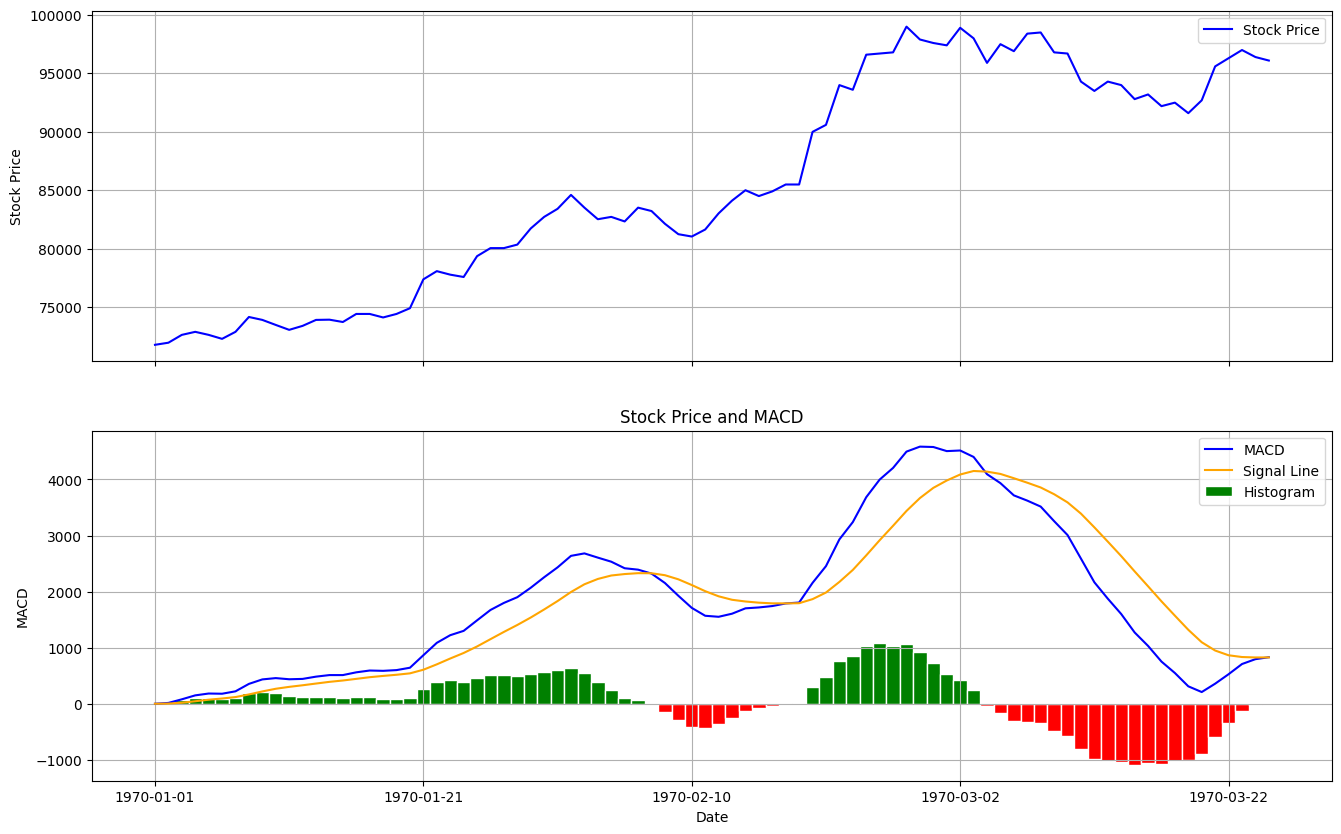

In [38]:
# Determine colors for the MACD Histogram bars
colors = ['g' if value >= 0 else 'r' for value in df['Histogram']]

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(16, 10))

# Plot stock price on the top subplot
ax1.plot(df.index, df['close'], label='Stock Price', color='blue')
ax1.set_ylabel('Stock Price')
ax1.grid()

# Plot MACD and Histogram on the bottom subplot with custom colors
ax2.plot(df.index, df['MACD'], label='MACD', color='blue')
ax2.plot(df.index, df['Signal'], label='Signal Line', color='orange')

# Plot the MACD Histogram with custom colors
ax2.bar(df.index, df['Histogram'], width=1, label='Histogram', color=colors, edgecolor="white")

ax2.set_ylabel('MACD')
ax2.grid()

# Format the x-axis to display true dates
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))


# Add title and legend
plt.title('Stock Price and MACD')
plt.xlabel('Date')
ax1.legend()
ax2.legend()

plt.show()